In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Load the dataset
df = pd.read_csv("./data/corporate_ratings.csv")

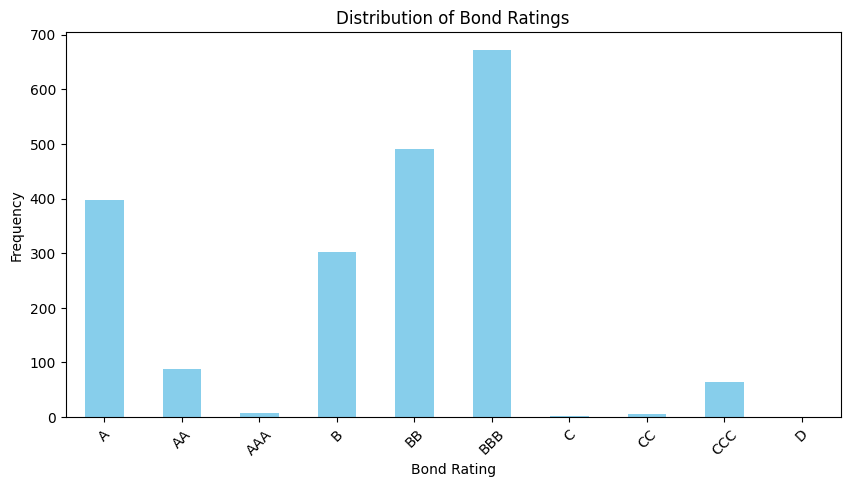

In [66]:
# Plot histogram of the original ratings
plt.figure(figsize=(10, 5))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Bond Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Bond Ratings")
plt.xticks(rotation=45)
plt.show()

In [67]:
# Collapse ratings into broader categories
rating_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C',
    'D': 'D'
}
df['collapsed_rating'] = df['Rating'].map(rating_map)

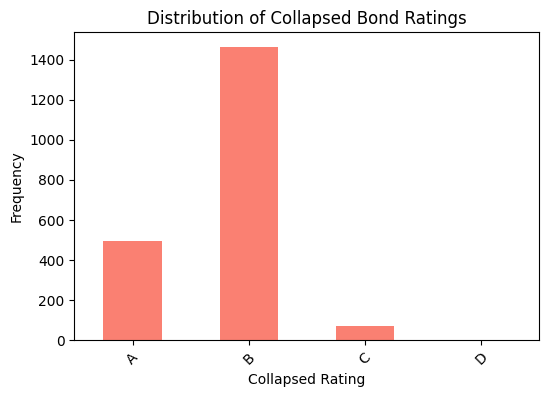

In [68]:
# Plot histogram of the collapsed ratings
plt.figure(figsize=(6, 4))
df['collapsed_rating'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.xlabel("Collapsed Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Collapsed Bond Ratings")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Drop unwanted columns
df = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

# Drop the row with "D" as the collapsed rating
df = df[df['collapsed_rating'] != 'D']

# One-hot encode the 'Sector' variable
df = pd.get_dummies(df, columns=['Sector'], drop_first=True)

# Collect all remaining columns as features (data matrix X)
X = df.values 

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [71]:
# Define features (X) and target variable (y)
X = df.drop(columns=['collapsed_rating']).values
y = df['collapsed_rating'].values

In [72]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
# Train a decision tree classifier with a min_samples_leaf constraint
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [74]:
# Predict on test set
y_pred = clf.predict(X_test)

In [75]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 71.67%

Classification Report:
              precision    recall  f1-score   support

           A       0.50      0.56      0.52        99
           B       0.81      0.80      0.81       293
           C       0.29      0.14      0.19        14

    accuracy                           0.72       406
   macro avg       0.53      0.50      0.51       406
weighted avg       0.72      0.72      0.72       406



In [76]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

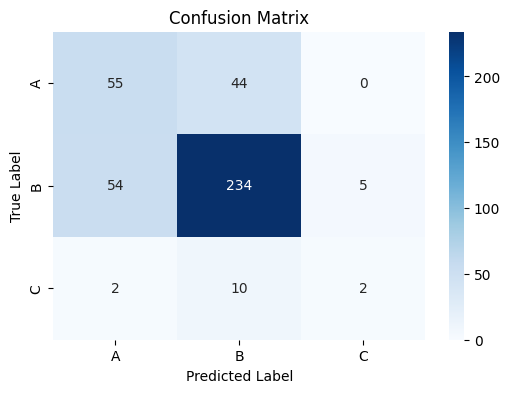

In [77]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The model is performing reasonably well overall, with an accuracy of 71.67%. It has a strong performance for class B and a moderate performance for class A, but a weak performance for class C.

Model Accuracy (with Rating Agency): 70.44%

Classification Report:
              precision    recall  f1-score   support

           A       0.48      0.59      0.53        99
           B       0.82      0.76      0.79       293
           C       0.33      0.29      0.31        14

    accuracy                           0.70       406
   macro avg       0.54      0.55      0.54       406
weighted avg       0.72      0.70      0.71       406



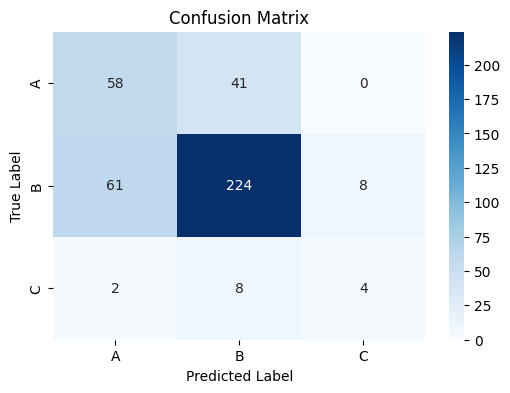

In [79]:
# Reload the dataset
df = pd.read_csv("./data/corporate_ratings.csv")

# Collapse ratings into broader categories
rating_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C',
    'D': 'D'
}
df['collapsed_rating'] = df['Rating'].map(rating_map)

# Drop unwanted columns
df = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])

# Drop the row with "D" as the collapsed rating
df = df[df['collapsed_rating'] != 'D']

# One-hot encode the 'Sector' and 'Rating Agency Name' variables
df = pd.get_dummies(df, columns=['Sector', 'Rating Agency Name'], drop_first=True)

# Collect all remaining columns as features (data matrix X)
X = df.values  

# Define features (X) and target variable (y)
X = df.drop(columns=['collapsed_rating']).values
y = df['collapsed_rating'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a new decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Compute new accuracy
new_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with Rating Agency): {new_accuracy:.2%}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



The model's accuracy dropped slightly from 71.67% to 70.44% after including the Rating Agency Name as a predictor. This suggests it has minimal impact on predictive power and that the rating agency does not significantly help the model differentiate between ratings. Financial fundamentals alone appear to be the primary determinant of ratings, making the agency name redundant or even slightly distracting.